# **Proposta de Trabalho 4 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:**  Guilherme Mendes de Oliveira
### **Matrícula** 2018046939


### **Tema:** Regressão Colônias de Abelha
### **Base de dados:**

# Importando Bibliotecas e Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE
import warnings


In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
dfMel = pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/-Dadostp4_Dataminning/main/US_honey_dataset_updated.csv',)

#Entendimento dos Dados

In [ ]:
dfMel.shape

(1115, 9)

In [ ]:
dfMel.sample(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
111,111,Nevada,14000,61,854000,171000,114.00,974000,1997
45,45,Arizona,32000,60,1920000,307000,84.00,1613000,1996
364,364,Michigan,65000,74,4810000,1732000,147.00,7071000,2003
678,678,Arkansas,22000,64,239000,239000,162.00,2281000,2011
878,878,California,310000,36,2009000,2009000,204.00,22766000,2016
27,27,NorthCarolina,12000,52,624000,162000,81.00,505000,1995
955,955,Alabama,6000,45,14000,14000,3.72,1004000,2018
911,911,Washington,84000,35,412000,412000,199.00,5851000,2016
451,451,Montana,130000,67,8710000,3136000,80.00,6968000,2005
822,822,Oregon,71000,40,767000,767000,220.00,6248000,2014


In [ ]:
dfMel = dfMel.drop(['Unnamed: 0'], axis=1)

In [ ]:
dfMel.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [ ]:
dfMel.dtypes

state                   object
colonies_number          int64
yield_per_colony         int64
production               int64
stocks                   int64
average_price          float64
value_of_production      int64
year                     int64
dtype: object

In [ ]:
dfMel.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


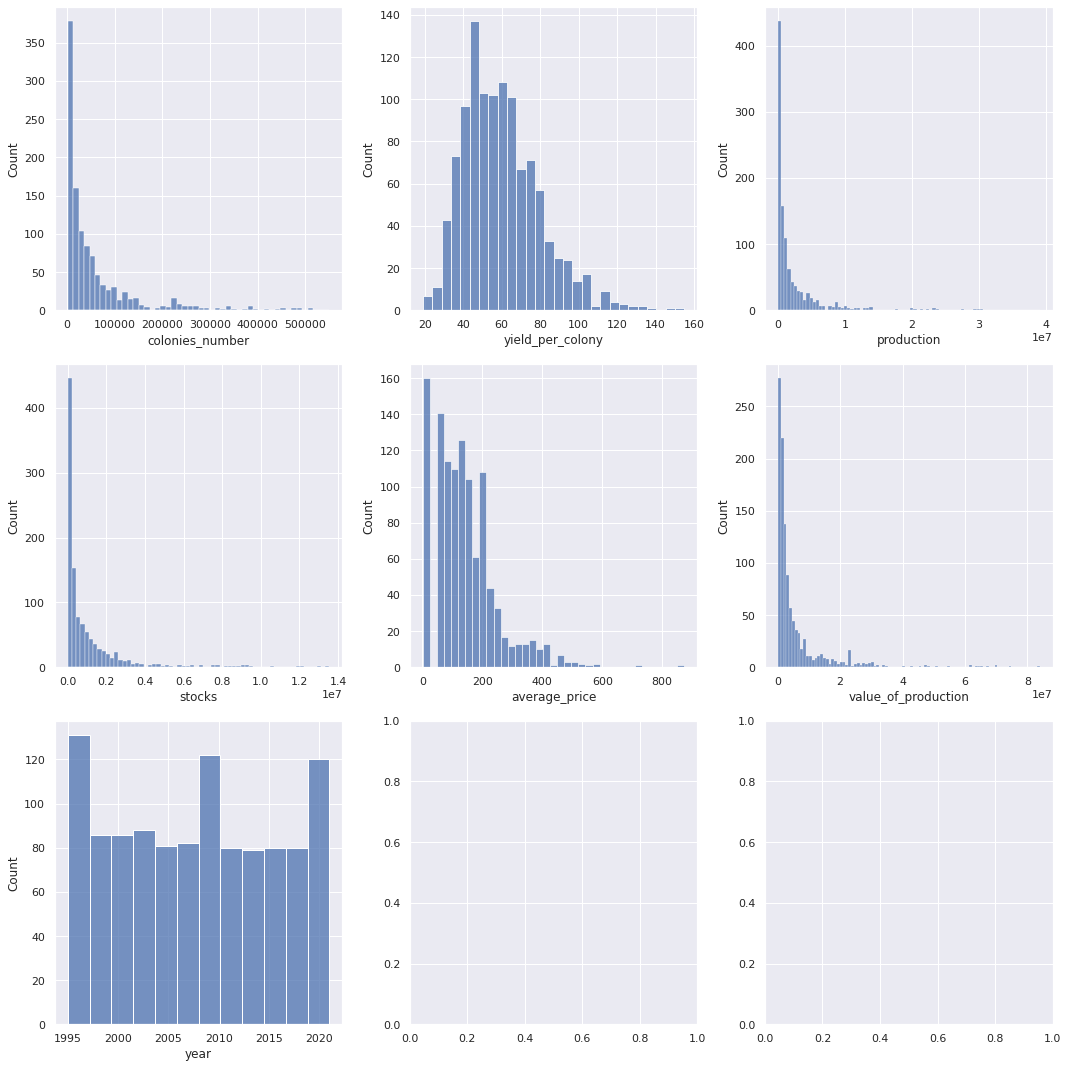

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (15,15),tight_layout = True)


sns.histplot(data = dfMel, x = 'colonies_number', palette = 'mako',ax = axs[0,0])
sns.histplot(data = dfMel, x = 'yield_per_colony', palette = 'mako',ax = axs[0,1])
sns.histplot(data = dfMel, x = 'production', palette = 'mako',ax = axs[0,2])
sns.histplot(data = dfMel, x = 'stocks', palette = 'mako',ax = axs[1,0])
sns.histplot(data = dfMel, x = 'average_price', palette = 'mako',ax = axs[1,1])
sns.histplot(data = dfMel, x = 'value_of_production', palette = 'mako',ax = axs[1,2])
sns.histplot(data = dfMel, x = 'year', palette = 'mako',ax = axs[2,0])

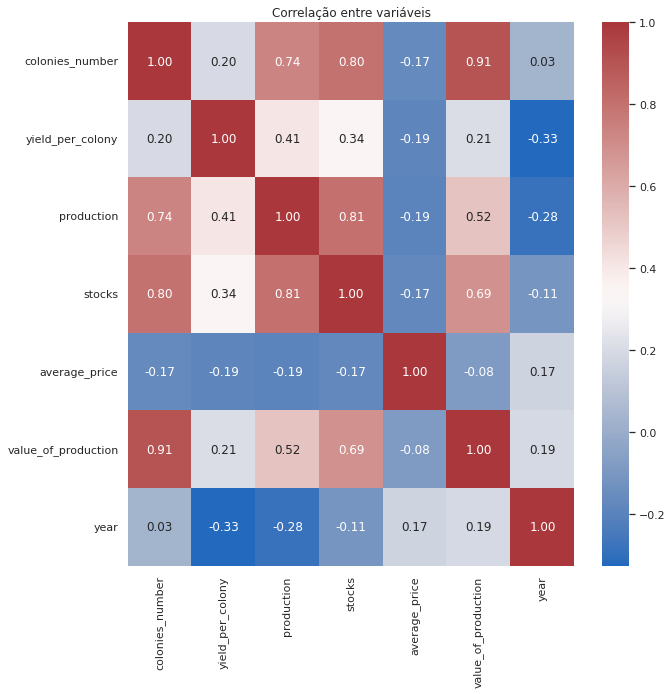

In [ ]:
plt.subplots(figsize = (10,10))
sns.heatmap(
    dfMel.corr(),
    annot = True,
    fmt = '.2f',
    cmap='vlag')

plt.title('Correlação entre variáveis')
plt.show()
figsize = (6.4,4.8)

#Modelagem

In [ ]:
#Normalizando os dados
dfNorm = dfMel.copy()
dfNorm['colonies_number'] = (dfNorm['colonies_number'] - dfNorm['colonies_number'].mean())/ dfNorm['colonies_number'].std()
dfNorm['yield_per_colony'] = (dfNorm['yield_per_colony'] - dfNorm['yield_per_colony'].mean())/ dfNorm['yield_per_colony'].std()
dfNorm['production'] = (dfNorm['production'] - dfNorm['production'].mean())/ dfNorm['production'].std()
dfNorm['stocks'] = (dfNorm['stocks'] - dfNorm['stocks'].mean())/ dfNorm['stocks'].std()
dfNorm['average_price'] = (dfNorm['average_price'] - dfNorm['average_price'].mean())/ dfNorm['average_price'].std()
dfNorm['value_of_production'] = (dfNorm['value_of_production'] - dfNorm['value_of_production'].mean())/ dfNorm['value_of_production'].std()

In [ ]:
dfNorm.sample(10)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
935,Montana,0.891129,0.614654,-0.062085,0.650568,0.751105,1.839913,2017
329,NewYork,-0.026321,1.918533,0.544618,0.633003,-0.220753,0.128188,2002
331,NorthDakota,2.779995,0.765101,3.802907,3.409214,0.012867,3.003616,2002
62,Minnesota,0.945096,0.865400,1.564182,0.216815,-0.463717,0.512036,1996
444,Kentucky,-0.619964,-0.488629,-0.467753,-0.552620,0.667002,-0.543098,2005
100,Kansas,-0.490442,0.564505,-0.295668,-0.236454,-0.557165,-0.495738,1997
746,SouthDakota,2.132383,0.163311,0.135354,1.186294,0.508141,2.777493,2012
1,Arizona,-0.112669,0.965698,0.225982,-0.091056,-0.678647,-0.303866,1995
405,Maine,-0.598377,-1.441463,-0.473687,-0.554084,-0.127305,-0.569949,2004
496,NewMexico,-0.598377,-0.588927,-0.452289,-0.521394,-0.416993,-0.564981,2006


In [ ]:
X= dfNorm[['yield_per_colony','production','stocks','average_price','value_of_production']]
y = dfNorm['colonies_number']

##Regressão Linear

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [ ]:
regLin = LinearRegression()

# Número de Atributos Previsoras
features = np.arange(1,6)
melhor_score=0
nf=0
scores =[]

for i in range(len(features)):
    ## Divisão treino e teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)
    regLin = LinearRegression()
    ## RFE
    rfe = RFE(estimator=regLin,n_features_to_select=features[i])
    ## Fit transform no treino
    X_treino_rfe = rfe.fit_transform(X_treino,Y_treino)
    X_teste_rfe = rfe.transform(X_teste)
    ## Treinando com X_treino_rfe e Y_treino
    regLin.fit(X_treino_rfe,Y_treino)
    ## Score do treinamento
    score = regLin.score(X_teste_rfe,Y_teste)
    ## Armazenando resultados na features vazia
    scores.append(score)
    ## Observando o melhor score dentre todos e nº ideal de features, o melhor score só se altera se for maior, se for igual é decisão de deixar o menor numero de features por questão de diminuir complexidade
    if(score > melhor_score):
        melhor_score = score
        nf = features[i]
    #print(score)
print("Numero ideal de features: %d" %nf)
print("Score com %d features: %f" % (nf, melhor_score))

Numero ideal de features: 5
Score com 5 features: 0.912166


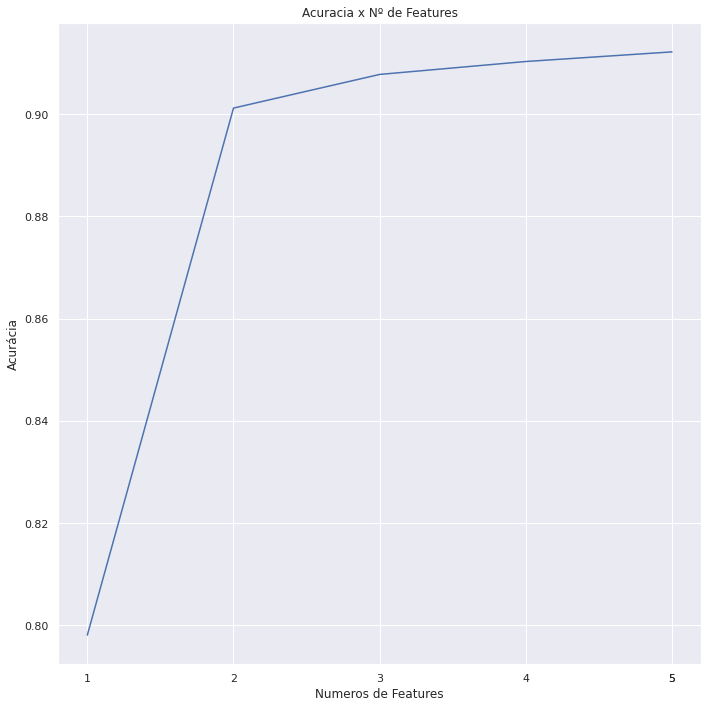

In [ ]:
fig, axs = plt.subplots(figsize = (10,10),tight_layout = True)
sns.set()
plt.plot(range(1,6),scores)
plt.xticks([1,2,3,4,5,5])
plt.title('Acuracia x Nº de Features')
plt.xlabel('Numeros de Features')
plt.ylabel('Acurácia')
plt.show()
figsize = (6.4,4.8)

In [ ]:
# Extraindo colunas dos Previsores
colunas = list(X.columns)
regLin = LinearRegression()
## RFE com número ideal de 5 features
rfe = RFE(estimator=regLin,n_features_to_select= 5)
## fit_transform para os Previsores
Previsores_rfe = rfe.fit_transform(X,y)
## Treinando
regLin.fit(Previsores_rfe,y)
## Pegando as features que foram selecionadas
temp = pd.Series(rfe.support_,index=colunas)
## Observando as melhores (.index)
features_selecionadas_rfe = temp[temp==True].index
features_selecionadas_rfe

Index(['yield_per_colony', 'production', 'stocks', 'average_price',
       'value_of_production'],
      dtype='object')

In [ ]:
X = dfNorm[features_selecionadas_rfe]
y = dfNorm['colonies_number']

In [ ]:
X_trainRegLin, X_testRegLin, y_trainRegLin, y_testRegLin = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [ ]:
regLin = LinearRegression()
regLin.fit(X_trainRegLin,y_trainRegLin)
resRegLin = regLin.predict(X_testRegLin)

##SVM

In [ ]:
X = dfNorm[['yield_per_colony','production','stocks','average_price','value_of_production']]
y = dfNorm['colonies_number']

In [ ]:
svm = LinearSVC()

# Número de Atributos Previsoras
features = np.arange(1,6)
melhor_score=0
nf=0
scores =[]

for i in range(len(features)):
    ## Divisão treino e teste
    X = X.astype('int')
    y = y.astype('int')
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)
    svm = LinearSVC()
    ## RFE
    rfe = RFE(estimator=svm,n_features_to_select=features[i],step=1)
    ## Fit transform no treino
    X_treino_rfe = rfe.fit_transform(X_treino,Y_treino)
    X_teste_rfe = rfe.transform(X_teste)
    ## Treinando com X_treino_rfe e Y_treino
    svm.fit(X_treino_rfe,Y_treino)
    ## Score do treinamento
    score = svm.score(X = X_teste_rfe,y = Y_teste)
    ## Armazenando resultados na lista de features
    scores.append(score)
    ## Observando o melhor score dentre todos e nº ideal de features, o melhor score só se altera se for maior, se for igual é decisão de deixar o menor numero de features por questão de diminuir complexidade
    if(score > melhor_score):
        melhor_score = score
        nf = features[i]
    #print(score)
print("Numero ideal de features: %d" %nf)
print("Score com %d features: %f" % (nf, melhor_score))

Numero ideal de features: 2
Score com 2 features: 0.955224


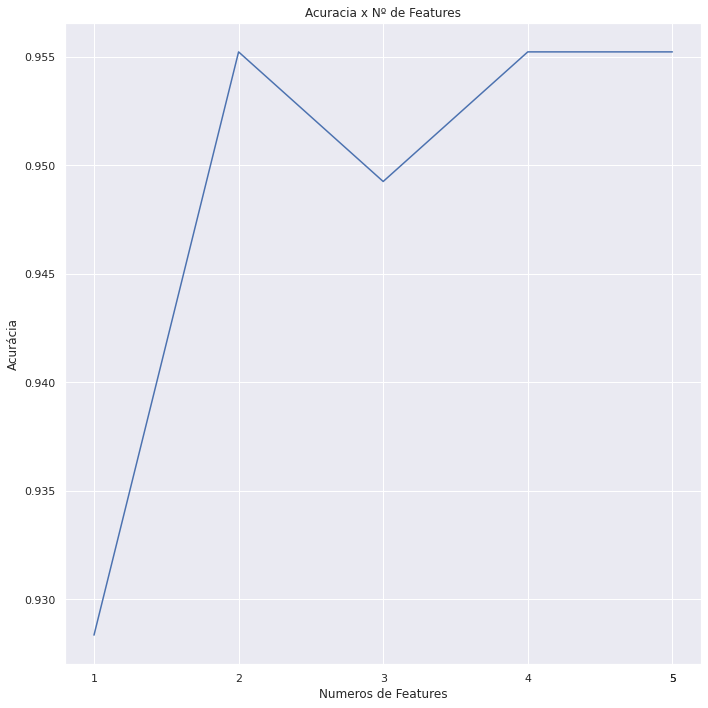

In [ ]:
fig, axs = plt.subplots(figsize = (10,10),tight_layout = True)
sns.set()
plt.plot(range(1,6),scores)
plt.xticks([1,2,3,4,5,5])
plt.title('Acuracia x Nº de Features')
plt.xlabel('Numeros de Features')
plt.ylabel('Acurácia')
plt.show()
figsize = (6.4,4.8)

In [ ]:
# Extraindo colunas dos Previsores
colunas = list(X.columns)
svm = LinearSVC()
## RFE com número ideal de 2 features
rfe = RFE(estimator=svm,n_features_to_select= 2)
## fit_transform para os Previsores
Previsores_rfe = rfe.fit_transform(X,y)
## Treinando
svm.fit(Previsores_rfe,y)
## Pegando as features que foram selecionadas
temp = pd.Series(rfe.support_,index=colunas)
## Observando as melhores (.index)
features_selecionadas_rfe = temp[temp==True].index
features_selecionadas_rfe

Index(['production', 'value_of_production'], dtype='object')

In [ ]:
X = dfNorm[features_selecionadas_rfe]
y = dfNorm['colonies_number']

X = X.astype('int')
y = y.astype('int')

In [ ]:
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [ ]:
svm = LinearSVC()
svm.fit(X_trainSVM,y_trainSVM)
resSVM = svm.predict(X_testSVM)

#Resultados experimentais e análise

##Regressão Linear

In [ ]:
#RMSE: ou Raiz do Erro Quadrático Médio, é comumente usada para expressar a acurácia dos resultados numéricos do modelo.
rmseLin = mean_squared_error(resRegLin, y_testRegLin)
rmseLin

0.07457906951851426

In [ ]:
#xpressa a porcentagem de variância explicada pelas variáveis independentes apresentadas no modelo.
rscoreLin = r2_score(y_testRegLin, resRegLin)
rscoreLin

0.9342728616960904

##SVM

In [ ]:
#RMSE: ou Raiz do Erro Quadrático Médio, é comumente usada para expressar a acurácia dos resultados numéricos do modelo.
rmseSVM = mean_squared_error(resSVM, y_testSVM)
rmseSVM

0.1827956989247312

In [ ]:
#Expressa a porcentagem de variância explicada pelas variáveis independentes apresentadas no modelo.
rscoreSVM = r2_score(y_testSVM, resSVM)
rscoreSVM

0.6889020070838253